# 6.2.5 Practical activity: Preparing quantitative data

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell # type: ignore
InteractiveShell.ast_node_interactivity = 'all'


In [4]:
# Import the CSV file with Pandas.
data = pd.read_csv('raw_sales.csv')

# View the DataFrame.
print(data.shape)
data.head()

(29580, 5)


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
# View the meta
print(data.info())
print("\n" + "-"*40 + "\n")
print(data.isnull().sum())
print("\n" + "-"*40 + "\n")
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None

----------------------------------------

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

----------------------------------------



,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [6]:
# Create a plot of the data.
# Create a df for the count of bedrooms.
bedrooms = data['bedrooms'].value_counts().reset_index()

# View the df.
bedrooms.head()

,bedrooms,count
0,3,11933
1,4,10442
2,2,3598
3,5,1950
4,1,1627


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='bedrooms', ylabel='count'>

Text(0.5, 1.0, 'Count of Bedrooms')

Text(0.5, 0, 'Number of Bedrooms')

Text(0, 0.5, 'Houses')

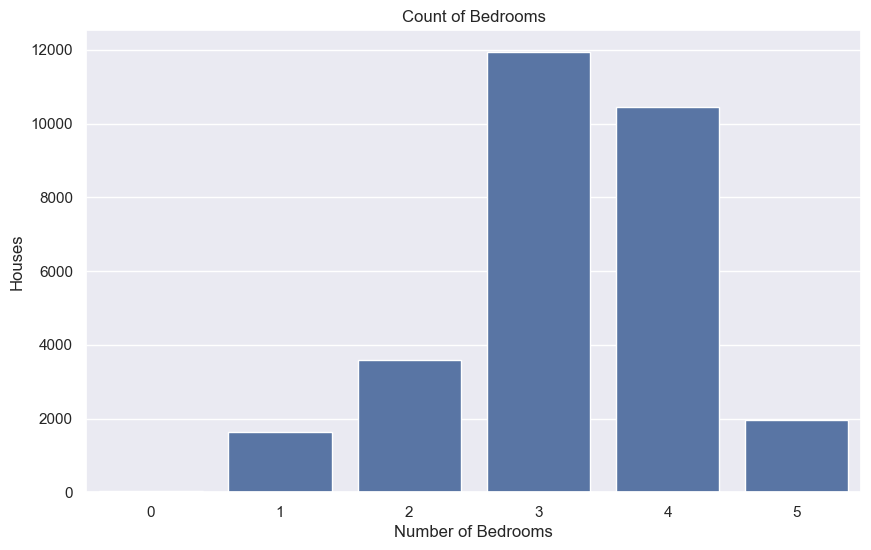

In [30]:
# Set the size of the plot.
plt.figure(figsize=(10, 6))

# Create a bar plot.
sns.barplot(x='bedrooms', y='count', data=bedrooms)

# Add labels to the plot.
plt.title('Count of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Houses')

# Show the plot.
plt.show()

##### According to the plot above, 3 Bedrooms are the most common house size

In [8]:
# Create a subset of data df.
one_bed = data[data['bedrooms'] == 1].drop('bedrooms', axis=1)
two_bed = data[data['bedrooms'] == 2].drop('bedrooms', axis=1)
three_bed= data[data['bedrooms'] == 3].drop('bedrooms', axis=1)
four_bed = data[data['bedrooms'] == 4].drop('bedrooms', axis=1)
five_bed = data[data['bedrooms'] == 5].drop('bedrooms', axis=1)

# View the first 1 rows of each df.
one_bed.head(1)
two_bed.head(1)
three_bed.head(1)
four_bed.head(1)
five_bed.head(1)

,datesold,postcode,price,propertyType
19,2007-07-08 00:00:00,2600,327000,house


,datesold,postcode,price,propertyType
45,2007-08-28 00:00:00,2906,325000,house


,datesold,postcode,price,propertyType
1,2007-02-27 00:00:00,2906,290000,house


,datesold,postcode,price,propertyType
0,2007-02-07 00:00:00,2607,525000,house


,datesold,postcode,price,propertyType
15,2007-07-02 00:00:00,2914,800000,house


(0.0, 1.0, 0.0, 1.0)

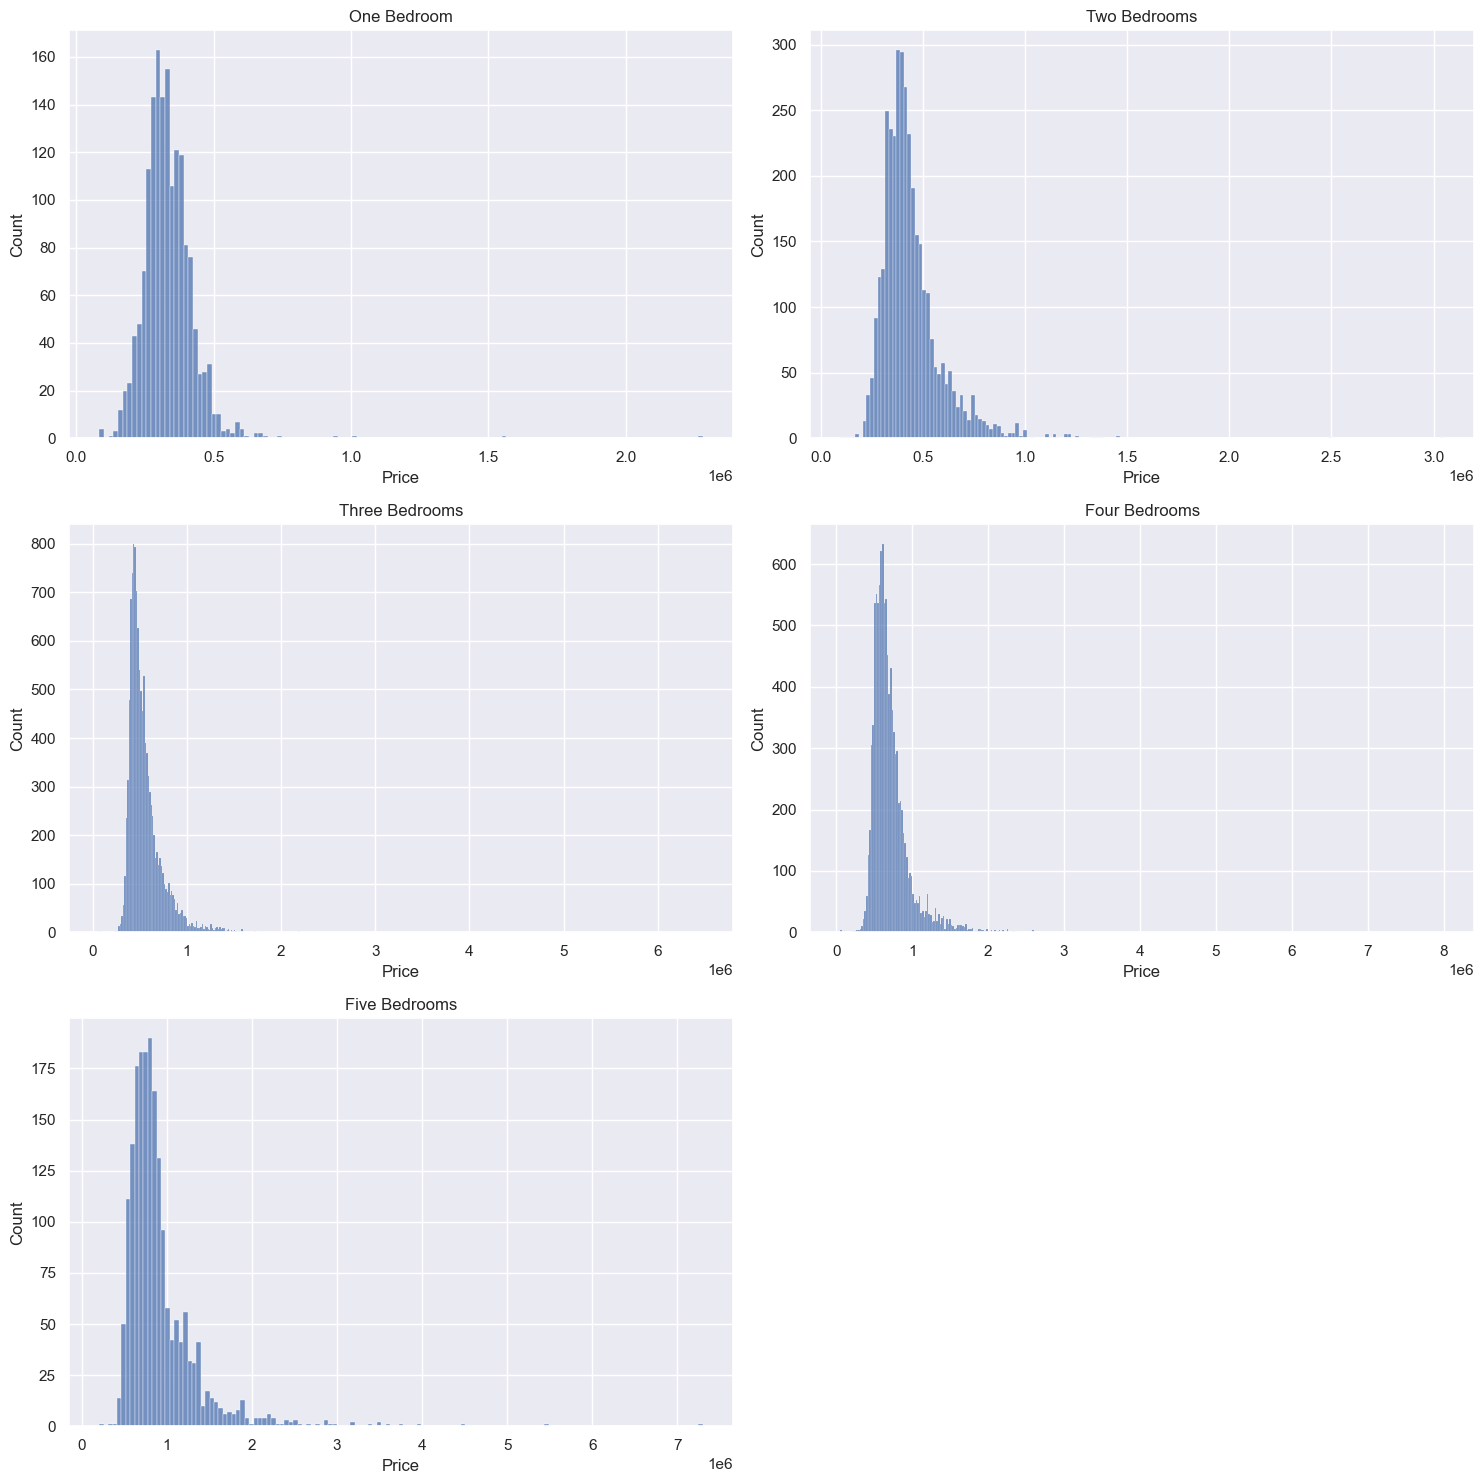

In [31]:
# Create a function to create histograms
def plot_hist(df, title, ax):
  sns.histplot(df['price'], ax=ax)
  ax.set_title(title)
  ax.set_xlabel('Price')
  ax.set_ylabel('Count')

# Create subplots in a three-by-two layout
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot the histograms in the specified layout
plot_hist(one_bed, 'One Bedroom', axs[0, 0])
plot_hist(two_bed, 'Two Bedrooms', axs[0, 1])
plot_hist(three_bed, 'Three Bedrooms', axs[1, 0])
plot_hist(four_bed, 'Four Bedrooms', axs[1, 1])
plot_hist(five_bed, 'Five Bedrooms', axs[2, 0])

# Hide the empty subplot (bottom right)
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

(0.0, 1.0, 0.0, 1.0)

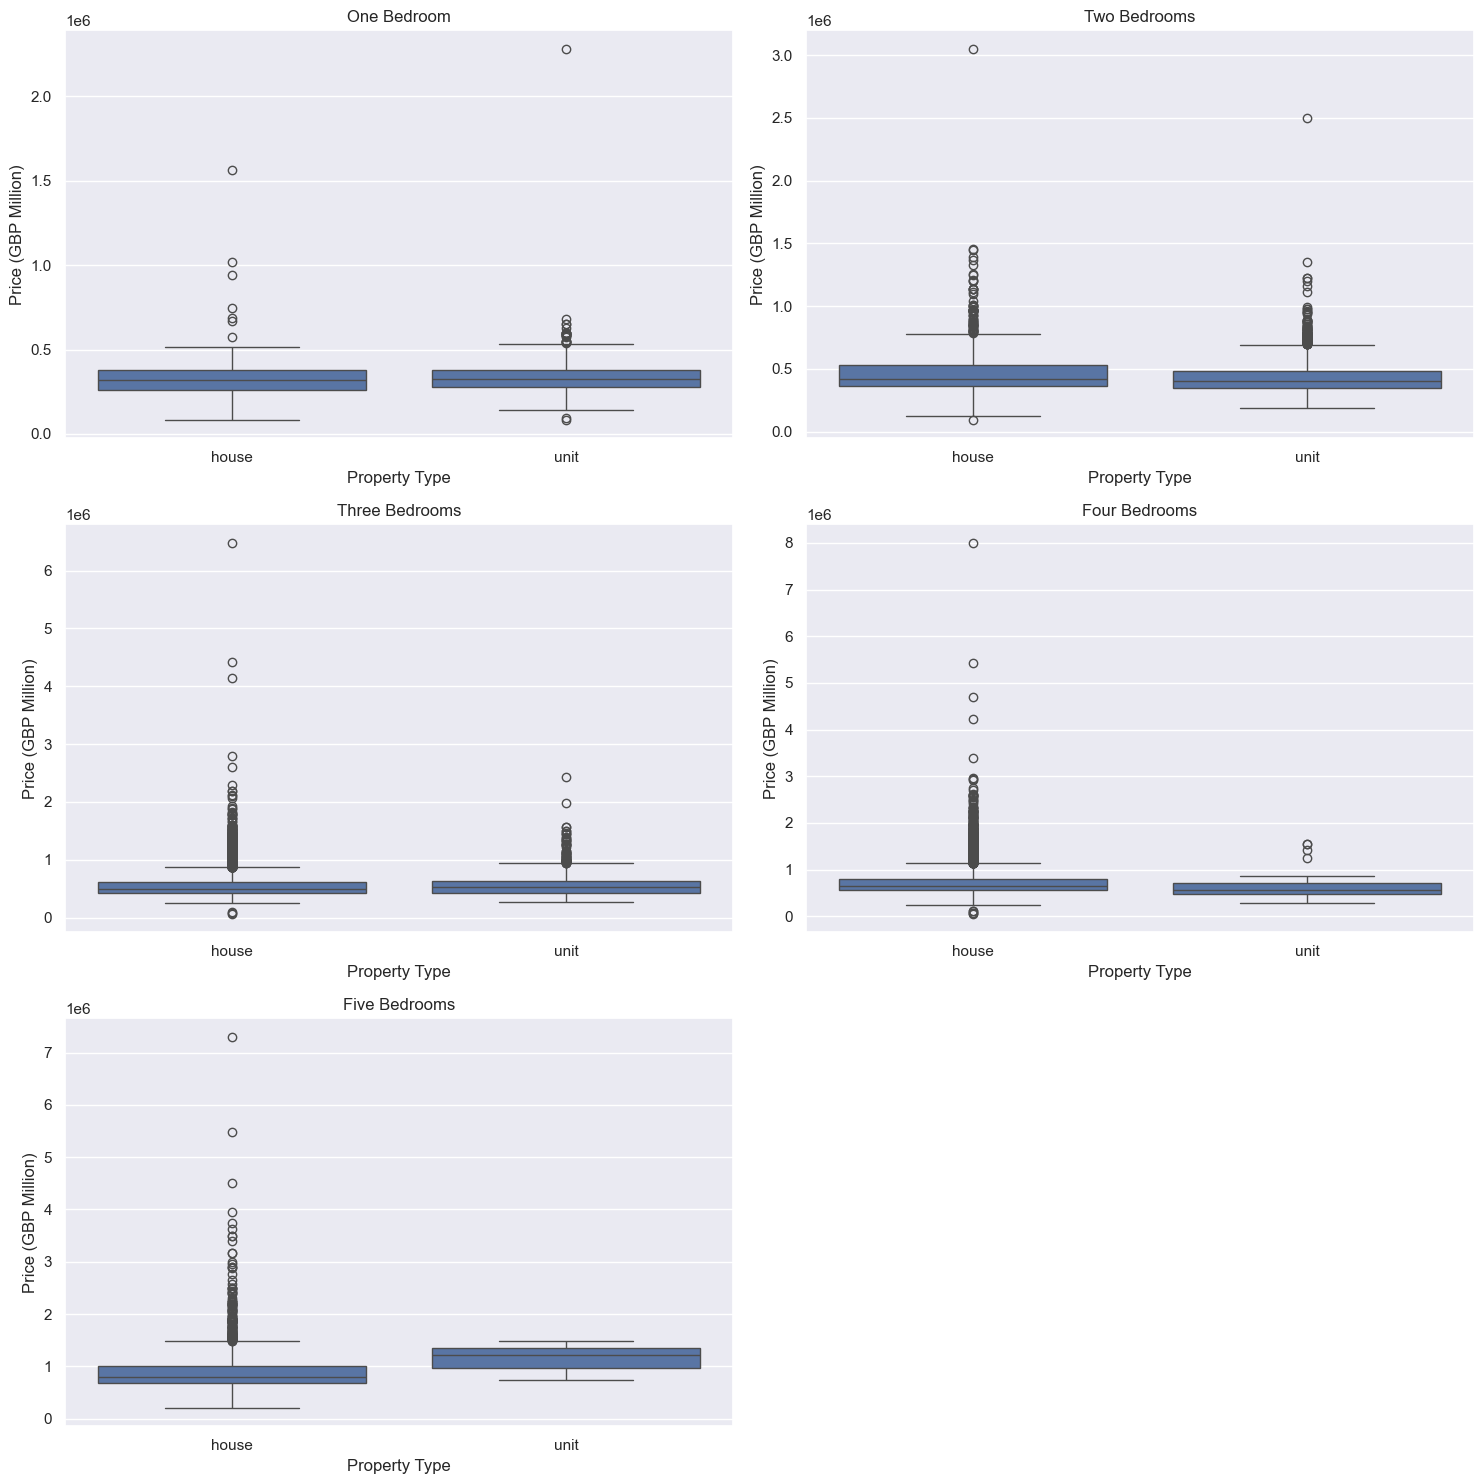

In [24]:
# Create a function to create boxplots
def plot_boxplot(df, title, ax):
    sns.boxplot(x='propertyType', y='price', data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Property Type')
    ax.set_ylabel('Price (GBP Million)') 

# Create subplots in a three-by-two layout
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot the boxplots in the specified layout
plot_boxplot(one_bed, 'One Bedroom', axs[0, 0])
plot_boxplot(two_bed, 'Two Bedrooms', axs[0, 1])
plot_boxplot(three_bed, 'Three Bedrooms', axs[1, 0])
plot_boxplot(four_bed, 'Four Bedrooms', axs[1, 1])
plot_boxplot(five_bed, 'Five Bedrooms', axs[2, 0])

# Hide the empty subplot (bottom right)
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [25]:
# Function to remove outliers from a DataFrame based on the 'price' column
def remove_outliers(df):
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    condition = ~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))
    return df[condition]

# Remove the outliers from each subset.
one_bed_clean = remove_outliers(one_bed)
two_bed_clean = remove_outliers(two_bed)
three_bed_clean = remove_outliers(three_bed)
four_bed_clean = remove_outliers(four_bed)
five_bed_clean = remove_outliers(five_bed)

In [27]:
one_bed_clean.head()

,datesold,postcode,price,propertyType
19,2007-07-08 00:00:00,2600,327000,house
71,2007-10-15 00:00:00,2615,273000,house
79,2007-10-25 00:00:00,2602,135500,house
106,2007-11-29 00:00:00,2912,308000,house
138,2008-01-23 00:00:00,2601,380000,house


(0.0, 1.0, 0.0, 1.0)

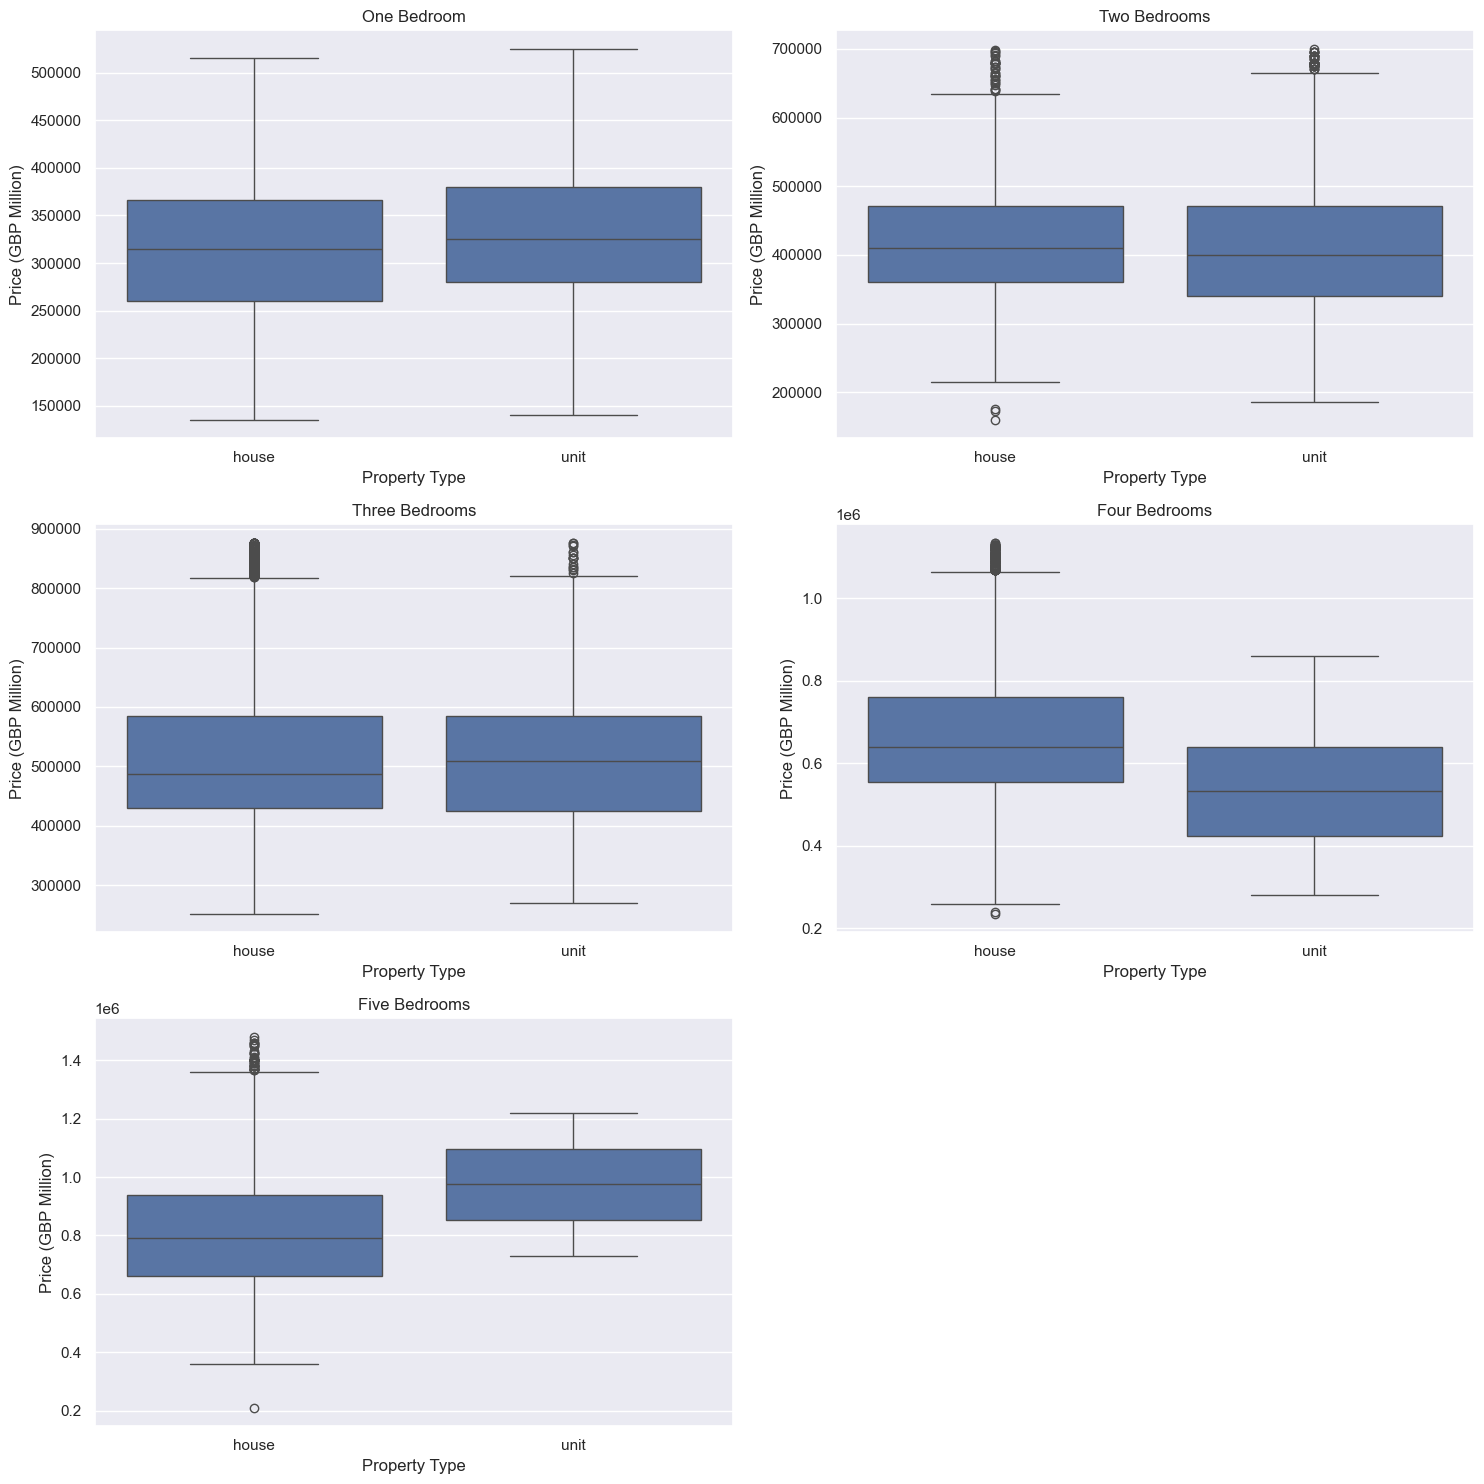

In [29]:
# Create a function to create boxplots
def plot_boxplot(df, title, ax):
    sns.boxplot(x='propertyType', y='price', data=df, ax=ax, whis=1.5)
    ax.set_title(title)
    ax.set_xlabel('Property Type')
    ax.set_ylabel('Price (GBP Million)')

# Create subplots in a three-by-two layout
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot the boxplots in the specified layout
plot_boxplot(one_bed_clean, 'One Bedroom', axs[0, 0])
plot_boxplot(two_bed_clean, 'Two Bedrooms', axs[0, 1])
plot_boxplot(three_bed_clean, 'Three Bedrooms', axs[1, 0])
plot_boxplot(four_bed_clean, 'Four Bedrooms', axs[1, 1])
plot_boxplot(five_bed_clean, 'Five Bedrooms', axs[2, 0])

# Hide the empty subplot (bottom right)
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
